In [100]:
# Import Required Libraries

import pandas as pd
import numpy as np
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 60)

In [101]:
# Classification Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeClassifier

from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc

In [102]:
# Encoding
from sklearn.preprocessing import OrdinalEncoder

# Hyperparameter tunning
from sklearn.model_selection import GridSearchCV

import pickle
import joblib

In [103]:
df = pd.read_csv('Datasets\Combined_data.csv')
df

,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CITY,STATE,POSTAL_CODE,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID,AGENT_NAME,DATE_OF_JOINING,AGENT_CITY,AGENT_STATE,AGENT_POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER,VENDOR_NAME,VENDOR_CITY,VENDOR_STATE,VENDOR_POSTAL_CODE,TRANSACTION_DAY,TRANSACTION_MONTH,TRANSACTION_YEAR,POLICY_EFF_DAY,POLICY_EFF_MONTH,POLICY_EFF_YEAR,LOSS_DAY,LOSS_MONTH,LOSS_YEAR,REPORT_DAY,REPORT_MONTH,REPORT_YEAR
0,Health,157.13,9000,Glendale,AZ,85308,Y,54,89,Y,3,L,Own,LI,Bachelor,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556,Amy Wangler,1994-01-06,Nashville,TN,37217,35441155,LRZO53254369804934,Ramsey Inc,Panama City,FL,32405,1,6,2020,23,6,2015,16,5,2020,21,5,2020
1,Property,141.71,26000,Arvada,CO,80005,N,61,80,Y,4,L,Rent,MI,Bachelor,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592,Jessica Montez,2004-05-28,Glendale,AZ,85301,44055451,XBYG14382904542874,"Morales, Campbell and Washington",Fayetteville,AR,72701,1,6,2020,21,4,2018,13,5,2020,18,5,2020
2,Property,157.24,13000,Vallejo,CA,94591,N,47,68,Y,6,L,Rent,MI,PhD,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031,Howard Smith,2004-08-01,Montgomery,AL,36105,55770246,WRXH14597428306333,Johnson Ltd,Fayetteville,AR,72703,1,6,2020,3,10,2019,21,5,2020,26,5,2020
3,Health,172.87,16000,Thunderbolt,GA,31404,Y,36,16,Y,7,L,Mortgage,MI,Masters,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075,Patricia Tucker,2007-06-12,Norman,OK,73071,87652976,YEPN16077902472499,Blackwell-Foster,Nashville,TN,37215,1,6,2020,29,11,2016,14,5,2020,19,5,2020
4,Travel,88.53,3000,Livermore,CA,94550,Y,51,16,Y,2,M,Rent,HI,Masters,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472,Brenda Bean,2010-01-19,Glen Burnie,MD,21061,76119019,HZBK86544578578547,Evans-Scott,Washington,DC,20018,1,6,2020,26,12,2011,17,5,2020,22,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Motor,105.75,1000,Manchester,CT,6042,N,45,98,Y,3,M,Own,MI,PhD,A,Minor Loss,Ambulance,1,1,CT,Manchester,0,AGENT00779,VNDR00001,Melissa Scott,1990-10-12,Fayetteville,AR,72703,35413882,LFOJ76068590051807,"King, Proctor and Jones",Fayetteville,AR,72703,30,6,2021,11,4,2014,25,6,2021,26,6,2021
9996,Life,64.59,67000,Fayetteville,AR,72701,Y,52,92,Y,3,L,Mortgage,LI,Masters,A,Total Loss,Police,1,0,MA,Worcester,6,AGENT00254,VNDR00598,Freda Dudley,2013-01-17,Savannah,GA,31405,91206790,AHEF60771774635030,"Newton, Hodges and Henry",Union City,CA,94587,30,6,2021,25,8,2015,12,6,2021,17,6,2021
9997,Health,183.50,8000,Anchorage,AK,99577,Y,53,32,Y,2,M,Mortgage,LI,Bachelor,A,Major Loss,Ambulance,1,1,OK,Oklahoma City,12,AGENT00786,VNDR00104,Victor Perrin,1993-02-11,Louisville,KY,40272,115241097,WREH18805592939657,Reese-Mckinney,Needham,MA,2492,30,6,2021,11,10,2018,18,6,2021,23,6,2021
9998,Motor,113.46,2000,Oakland,CA,94605,Y,61,44,Y,7,M,Rent,MI,Bachelor,A,Total Loss,Ambulance,0,1,AR,Fayetteville,6,AGENT00927,VNDR00185,Maria Lynn,2010-04-16,Fayetteville,AR,72703,13995380,AAZI21883736448048,"Harmon, Manning and Bradley",Annapolis,MD,21402,30,6,2021,29,1,2016,16,6,2021,21,6,2021


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   INSURANCE_TYPE            10000 non-null  object 
 1   PREMIUM_AMOUNT            10000 non-null  float64
 2   CLAIM_AMOUNT              10000 non-null  int64  
 3   CITY                      10000 non-null  object 
 4   STATE                     10000 non-null  object 
 5   POSTAL_CODE               10000 non-null  int64  
 6   MARITAL_STATUS            10000 non-null  object 
 7   AGE                       10000 non-null  int64  
 8   TENURE                    10000 non-null  int64  
 9   EMPLOYMENT_STATUS         10000 non-null  object 
 10  NO_OF_FAMILY_MEMBERS      10000 non-null  int64  
 11  RISK_SEGMENTATION         10000 non-null  object 
 12  HOUSE_TYPE                10000 non-null  object 
 13  SOCIAL_CLASS              10000 non-null  object 
 14  CUSTOME

In [105]:
df.describe()

,PREMIUM_AMOUNT,CLAIM_AMOUNT,POSTAL_CODE,AGE,TENURE,NO_OF_FAMILY_MEMBERS,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_HOUR_OF_THE_DAY,AGENT_POSTAL_CODE,EMP_ROUTING_NUMBER,VENDOR_POSTAL_CODE,TRANSACTION_DAY,TRANSACTION_MONTH,TRANSACTION_YEAR,POLICY_EFF_DAY,POLICY_EFF_MONTH,POLICY_EFF_YEAR,LOSS_DAY,LOSS_MONTH,LOSS_YEAR,REPORT_DAY,REPORT_MONTH,REPORT_YEAR
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,88.508595,16563.830000,48288.830500,44.466100,62.949800,4.488400,0.699100,0.692800,11.604000,50292.170600,7.099599e+07,49884.846600,15.580300,6.453600,2020.465200,15.726700,6.633900,2014.682300,15.559400,6.451000,2020.43700,15.537600,6.452700,2020.445700
std,48.315874,22037.489735,32467.389801,11.516827,32.890604,1.712588,0.458672,0.461356,6.877101,33369.953441,3.452747e+07,31811.553218,8.687042,3.345858,0.498812,8.800065,3.466767,2.812678,8.806806,3.350809,0.49604,8.788635,3.352326,0.497068
min,6.000000,100.000000,1001.000000,25.000000,6.000000,2.000000,0.000000,0.000000,0.000000,1007.000000,1.002215e+07,1104.000000,1.000000,1.000000,2020.000000,1.000000,1.000000,2010.000000,1.000000,1.000000,2020.00000,1.000000,1.000000,2020.000000
25%,62.015000,2000.000000,21061.000000,34.000000,34.000000,3.000000,0.000000,0.000000,6.000000,21061.000000,4.007634e+07,21402.000000,8.000000,4.000000,2020.000000,8.000000,4.000000,2012.000000,8.000000,4.000000,2020.00000,8.000000,4.000000,2020.000000
50%,88.835000,7000.000000,37206.000000,45.000000,64.000000,4.000000,1.000000,1.000000,12.000000,37211.000000,7.258413e+07,37221.000000,15.000000,6.000000,2020.000000,16.000000,7.000000,2015.000000,15.000000,6.000000,2020.00000,15.000000,6.000000,2020.000000
75%,121.902500,21000.000000,80004.000000,54.000000,92.000000,6.000000,1.000000,1.000000,18.000000,81007.000000,1.010319e+08,80003.000000,23.000000,9.000000,2021.000000,23.000000,10.000000,2017.000000,23.000000,9.000000,2021.00000,23.000000,9.000000,2021.000000
max,200.000000,100000.000000,99669.000000,64.000000,119.000000,7.000000,1.000000,1.000000,23.000000,99577.000000,1.299226e+08,99603.000000,31.000000,12.000000,2021.000000,31.000000,12.000000,2020.000000,31.000000,12.000000,2021.00000,31.000000,12.000000,2021.000000


In [106]:
df.columns = [col.lower() for col in df.columns]

In [107]:
df['day_of_joining'] = pd.to_datetime(df.date_of_joining).dt.day
df['month_of_joining'] = pd.to_datetime(df.date_of_joining).dt.month
df['year_of_joining'] = pd.to_datetime(df.date_of_joining).dt.year
df.drop('date_of_joining', axis = 1, inplace = True)

# Converting Categorical columns into Numerical columns

In [108]:
df.select_dtypes(include='object')

,insurance_type,city,state,marital_status,employment_status,risk_segmentation,house_type,social_class,customer_education_level,claim_status,incident_severity,authority_contacted,incident_state,incident_city,agent_id,vendor_id,agent_name,agent_city,agent_state,emp_acct_number,vendor_name,vendor_city,vendor_state
0,Health,Glendale,AZ,Y,Y,L,Own,LI,Bachelor,A,Major Loss,Police,GA,Savannah,AGENT00413,VNDR00556,Amy Wangler,Nashville,TN,LRZO53254369804934,Ramsey Inc,Panama City,FL
1,Property,Arvada,CO,N,Y,L,Rent,MI,Bachelor,A,Total Loss,Ambulance,AL,Montgomery,AGENT00769,VNDR00592,Jessica Montez,Glendale,AZ,XBYG14382904542874,"Morales, Campbell and Washington",Fayetteville,AR
2,Property,Vallejo,CA,N,Y,L,Rent,MI,PhD,A,Total Loss,Police,CO,Grand Junction,AGENT00883,VNDR00031,Howard Smith,Montgomery,AL,WRXH14597428306333,Johnson Ltd,Fayetteville,AR
3,Health,Thunderbolt,GA,Y,Y,L,Mortgage,MI,Masters,A,Minor Loss,Ambulance,GA,Savannah,AGENT00278,VNDR00075,Patricia Tucker,Norman,OK,YEPN16077902472499,Blackwell-Foster,Nashville,TN
4,Travel,Livermore,CA,Y,Y,M,Rent,HI,Masters,A,Major Loss,Police,TN,Nashville,AGENT00636,VNDR00472,Brenda Bean,Glen Burnie,MD,HZBK86544578578547,Evans-Scott,Washington,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Motor,Manchester,CT,N,Y,M,Own,MI,PhD,A,Minor Loss,Ambulance,CT,Manchester,AGENT00779,VNDR00001,Melissa Scott,Fayetteville,AR,LFOJ76068590051807,"King, Proctor and Jones",Fayetteville,AR
9996,Life,Fayetteville,AR,Y,Y,L,Mortgage,LI,Masters,A,Total Loss,Police,MA,Worcester,AGENT00254,VNDR00598,Freda Dudley,Savannah,GA,AHEF60771774635030,"Newton, Hodges and Henry",Union City,CA
9997,Health,Anchorage,AK,Y,Y,M,Mortgage,LI,Bachelor,A,Major Loss,Ambulance,OK,Oklahoma City,AGENT00786,VNDR00104,Victor Perrin,Louisville,KY,WREH18805592939657,Reese-Mckinney,Needham,MA
9998,Motor,Oakland,CA,Y,Y,M,Rent,MI,Bachelor,A,Total Loss,Ambulance,AR,Fayetteville,AGENT00927,VNDR00185,Maria Lynn,Fayetteville,AR,AAZI21883736448048,"Harmon, Manning and Bradley",Annapolis,MD


In [109]:
df.select_dtypes(include='object').nunique() <10
unique_10 = [col for col in df.select_dtypes(include='object').columns if df[col].nunique()<=10]
for col in unique_10:
    print(f'Column Name: {col}')
    print(f'Unique Values: {df[col].unique()}')

Column Name: insurance_type
Unique Values: ['Health' 'Property' 'Travel' 'Life' 'Motor' 'Mobile']
Column Name: marital_status
Unique Values: ['Y' 'N']
Column Name: employment_status
Unique Values: ['Y' 'N']
Column Name: risk_segmentation
Unique Values: ['L' 'M' 'H']
Column Name: house_type
Unique Values: ['Own' 'Rent' 'Mortgage']
Column Name: social_class
Unique Values: ['LI' 'MI' 'HI']
Column Name: customer_education_level
Unique Values: ['Bachelor' 'PhD' 'Masters' 'College' 'High School' 'MD']
Column Name: claim_status
Unique Values: ['A' 'D']
Column Name: incident_severity
Unique Values: ['Major Loss' 'Total Loss' 'Minor Loss']
Column Name: authority_contacted
Unique Values: ['Police' 'Ambulance' 'Other']


In [110]:
insurance_type = {'Health': 0, 'Property':1, 'Travel':2, 'Life':3, 'Motor':4, 'Mobile':5}
marital_status = {'Y':1, 'N':0}
employment_status = {'Y':1, 'N':0}
risk_segmentation = {'L':0, 'M':1, 'H':2}
house_type = {'Own':0, 'Rent':1, 'Mortgage':3}
social_class = {'LI':0, 'MI':1, 'HI':2}
customer_education_level = {'High School':0, 'College':1, 'Bachelor':2, 'PhD':3, 'Masters':4,  'MD':5}
claim_status = {'A':0, 'D':1}
incident_severity = {'Major Loss':0, 'Total Loss':1, 'Minor Loss':2}
authority_contacted = {'Police':0, 'Ambulance':1, 'Other':2}

In [111]:
', '.join(unique_10)

'insurance_type, marital_status, employment_status, risk_segmentation, house_type, social_class, customer_education_level, claim_status, incident_severity, authority_contacted'

In [112]:
object_col = df.select_dtypes(include='object').columns
for col in unique_10:
    df[col] = df[col].map(eval(col))
df[object_col]

,insurance_type,city,state,marital_status,employment_status,risk_segmentation,house_type,social_class,customer_education_level,claim_status,incident_severity,authority_contacted,incident_state,incident_city,agent_id,vendor_id,agent_name,agent_city,agent_state,emp_acct_number,vendor_name,vendor_city,vendor_state
0,0,Glendale,AZ,1,1,0,0,0,2,0,0,0,GA,Savannah,AGENT00413,VNDR00556,Amy Wangler,Nashville,TN,LRZO53254369804934,Ramsey Inc,Panama City,FL
1,1,Arvada,CO,0,1,0,1,1,2,0,1,1,AL,Montgomery,AGENT00769,VNDR00592,Jessica Montez,Glendale,AZ,XBYG14382904542874,"Morales, Campbell and Washington",Fayetteville,AR
2,1,Vallejo,CA,0,1,0,1,1,3,0,1,0,CO,Grand Junction,AGENT00883,VNDR00031,Howard Smith,Montgomery,AL,WRXH14597428306333,Johnson Ltd,Fayetteville,AR
3,0,Thunderbolt,GA,1,1,0,3,1,4,0,2,1,GA,Savannah,AGENT00278,VNDR00075,Patricia Tucker,Norman,OK,YEPN16077902472499,Blackwell-Foster,Nashville,TN
4,2,Livermore,CA,1,1,1,1,2,4,0,0,0,TN,Nashville,AGENT00636,VNDR00472,Brenda Bean,Glen Burnie,MD,HZBK86544578578547,Evans-Scott,Washington,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4,Manchester,CT,0,1,1,0,1,3,0,2,1,CT,Manchester,AGENT00779,VNDR00001,Melissa Scott,Fayetteville,AR,LFOJ76068590051807,"King, Proctor and Jones",Fayetteville,AR
9996,3,Fayetteville,AR,1,1,0,3,0,4,0,1,0,MA,Worcester,AGENT00254,VNDR00598,Freda Dudley,Savannah,GA,AHEF60771774635030,"Newton, Hodges and Henry",Union City,CA
9997,0,Anchorage,AK,1,1,1,3,0,2,0,0,1,OK,Oklahoma City,AGENT00786,VNDR00104,Victor Perrin,Louisville,KY,WREH18805592939657,Reese-Mckinney,Needham,MA
9998,4,Oakland,CA,1,1,1,1,1,2,0,1,1,AR,Fayetteville,AGENT00927,VNDR00185,Maria Lynn,Fayetteville,AR,AAZI21883736448048,"Harmon, Manning and Bradley",Annapolis,MD


In [113]:
df.select_dtypes(include= 'object')

,city,state,incident_state,incident_city,agent_id,vendor_id,agent_name,agent_city,agent_state,emp_acct_number,vendor_name,vendor_city,vendor_state
0,Glendale,AZ,GA,Savannah,AGENT00413,VNDR00556,Amy Wangler,Nashville,TN,LRZO53254369804934,Ramsey Inc,Panama City,FL
1,Arvada,CO,AL,Montgomery,AGENT00769,VNDR00592,Jessica Montez,Glendale,AZ,XBYG14382904542874,"Morales, Campbell and Washington",Fayetteville,AR
2,Vallejo,CA,CO,Grand Junction,AGENT00883,VNDR00031,Howard Smith,Montgomery,AL,WRXH14597428306333,Johnson Ltd,Fayetteville,AR
3,Thunderbolt,GA,GA,Savannah,AGENT00278,VNDR00075,Patricia Tucker,Norman,OK,YEPN16077902472499,Blackwell-Foster,Nashville,TN
4,Livermore,CA,TN,Nashville,AGENT00636,VNDR00472,Brenda Bean,Glen Burnie,MD,HZBK86544578578547,Evans-Scott,Washington,DC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Manchester,CT,CT,Manchester,AGENT00779,VNDR00001,Melissa Scott,Fayetteville,AR,LFOJ76068590051807,"King, Proctor and Jones",Fayetteville,AR
9996,Fayetteville,AR,MA,Worcester,AGENT00254,VNDR00598,Freda Dudley,Savannah,GA,AHEF60771774635030,"Newton, Hodges and Henry",Union City,CA
9997,Anchorage,AK,OK,Oklahoma City,AGENT00786,VNDR00104,Victor Perrin,Louisville,KY,WREH18805592939657,Reese-Mckinney,Needham,MA
9998,Oakland,CA,AR,Fayetteville,AGENT00927,VNDR00185,Maria Lynn,Fayetteville,AR,AAZI21883736448048,"Harmon, Manning and Bradley",Annapolis,MD


In [114]:
df.select_dtypes(include= 'object').nunique()

city                413
state                16
incident_state       16
incident_city       406
agent_id           1200
vendor_id           407
agent_name         1198
agent_city          203
agent_state          16
emp_acct_number    1200
vendor_name         403
vendor_city         100
vendor_state         16
dtype: int64

In [115]:
enc=OrdinalEncoder()

# Specify categorical column names for ordinal encoding
column_names = df.select_dtypes(include = 'object').columns

# Dictionary to store unique values before and after ordinal encoding
unique_value ={}
for col in unique_10:
    unique_value[col]=eval(col) 
    
for col_name in column_names:
    data = df[col_name].unique()
    data.sort()

    df[col_name] = enc.fit_transform(df[[col_name]])

    globals()[col_name] = {}
    for i in df[col_name].unique():
        globals()[col_name][data[int(i)]] = i
        unique_value[f'{col_name}'] = globals()[col_name]
    
unique_value

{'insurance_type': {'Health': 0,
  'Property': 1,
  'Travel': 2,
  'Life': 3,
  'Motor': 4,
  'Mobile': 5},
 'marital_status': {'Y': 1, 'N': 0},
 'employment_status': {'Y': 1, 'N': 0},
 'risk_segmentation': {'L': 0, 'M': 1, 'H': 2},
 'house_type': {'Own': 0, 'Rent': 1, 'Mortgage': 3},
 'social_class': {'LI': 0, 'MI': 1, 'HI': 2},
 'customer_education_level': {'High School': 0,
  'College': 1,
  'Bachelor': 2,
  'PhD': 3,
  'Masters': 4,
  'MD': 5},
 'claim_status': {'A': 0, 'D': 1},
 'incident_severity': {'Major Loss': 0, 'Total Loss': 1, 'Minor Loss': 2},
 'authority_contacted': {'Police': 0, 'Ambulance': 1, 'Other': 2},
 'city': {'Glendale': 128.0,
  'Arvada': 11.0,
  'Vallejo': 368.0,
  'Thunderbolt': 356.0,
  'Livermore': 181.0,
  'Panama City': 262.0,
  'Savannah': 322.0,
  'Louisville': 184.0,
  'Montgomery': 224.0,
  'Manchester': 196.0,
  'Nashville': 234.0,
  'Anchorage': 3.0,
  'McCrory': 203.0,
  'Washington': 380.0,
  'Hartford': 146.0,
  'Berkeley': 28.0,
  'Panama City Be

In [116]:
import json
# Write the unique_value dictionary to a JSON file with proper indentation
with open('Datasets/Category_Columns_Encoded_Data.json', 'w') as file:
    json.dump(unique_value, file , indent = 4)

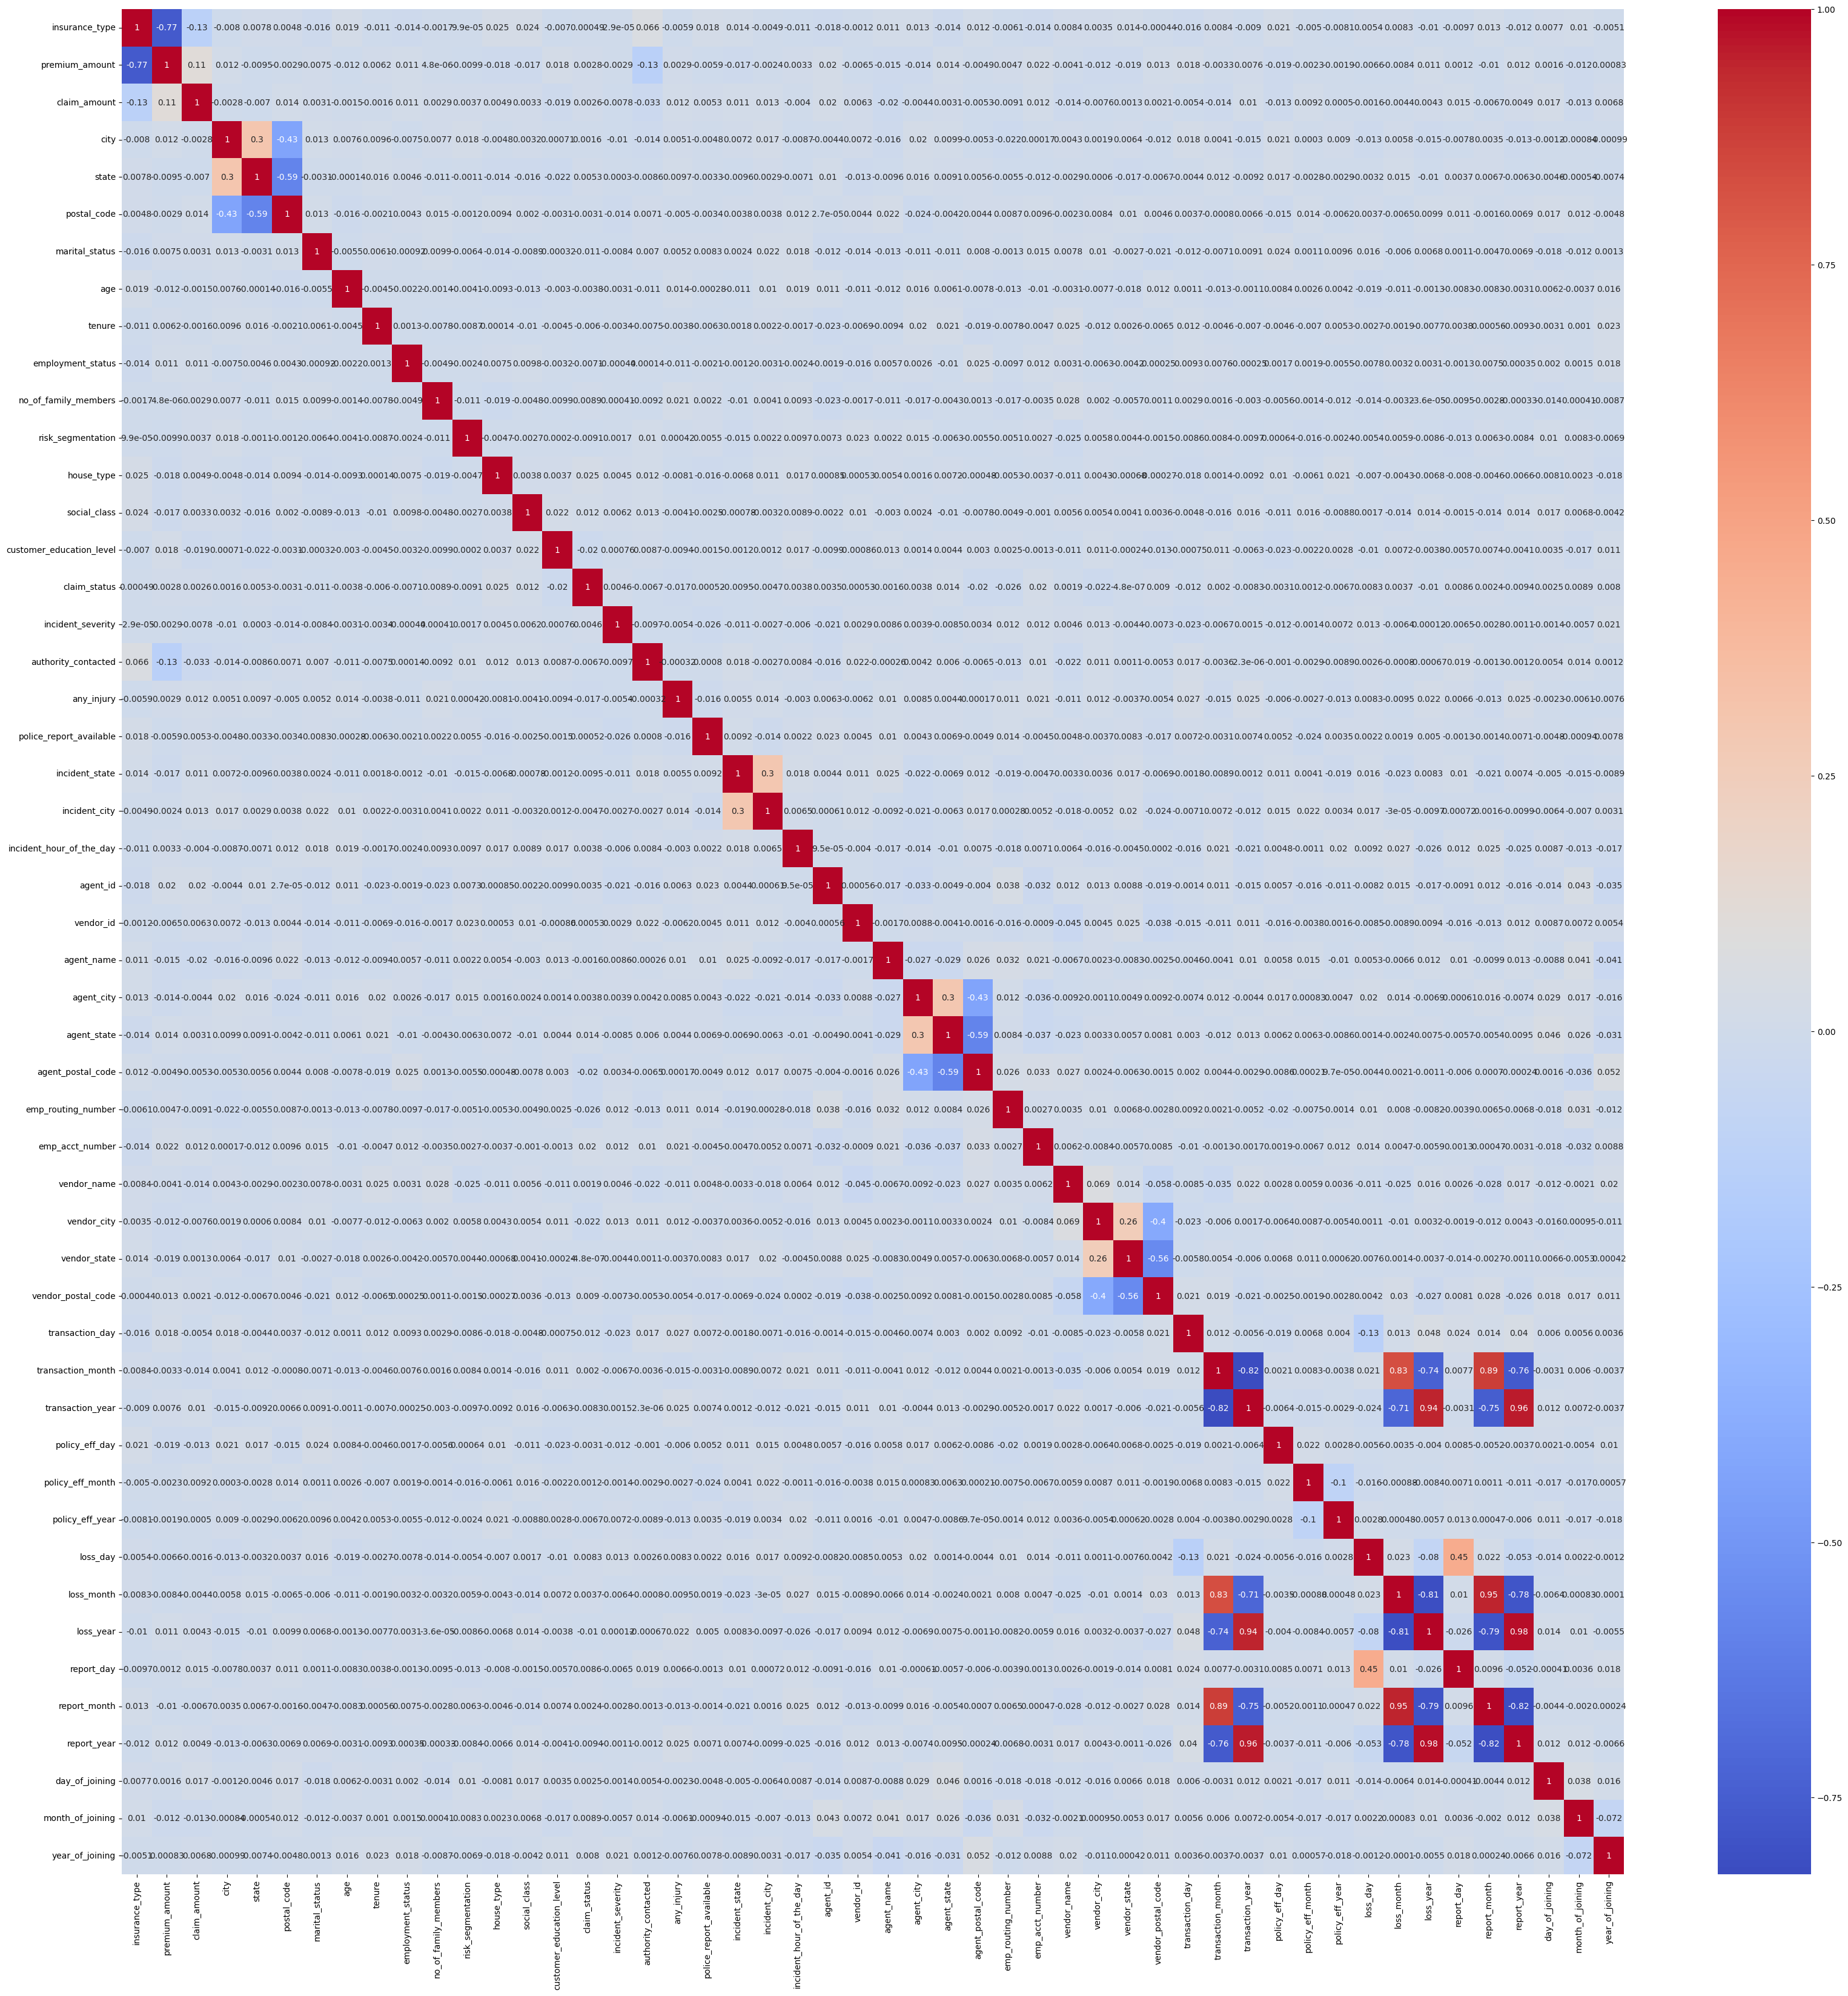

In [117]:
plt.figure(figsize=(40, 40))

sns.heatmap(data = df.corr(), annot=True, cmap = 'coolwarm')

plt.show()

In [118]:
high_corelated_col =[col for col in df.columns if 'loss' in col or 'report' in col and 'police' not in col]
high_corelated_col.extend([col for col in df.columns if ('_city' in col or '_state' in col or '_postal_code' in col ) & ('incident' not in col)])
print('Shape of the DataFrame before removing the columns', df.shape)
print('Droped Column names:', ', '.join(high_corelated_col))
df.drop(high_corelated_col, axis = 1, inplace = True)
print('Shape of the DataFrame After removing the columns', df.shape)

Shape of the DataFrame before removing the columns (10000, 50)
Droped Column names: loss_day, loss_month, loss_year, report_day, report_month, report_year, agent_city, agent_state, agent_postal_code, vendor_city, vendor_state, vendor_postal_code
Shape of the DataFrame After removing the columns (10000, 38)


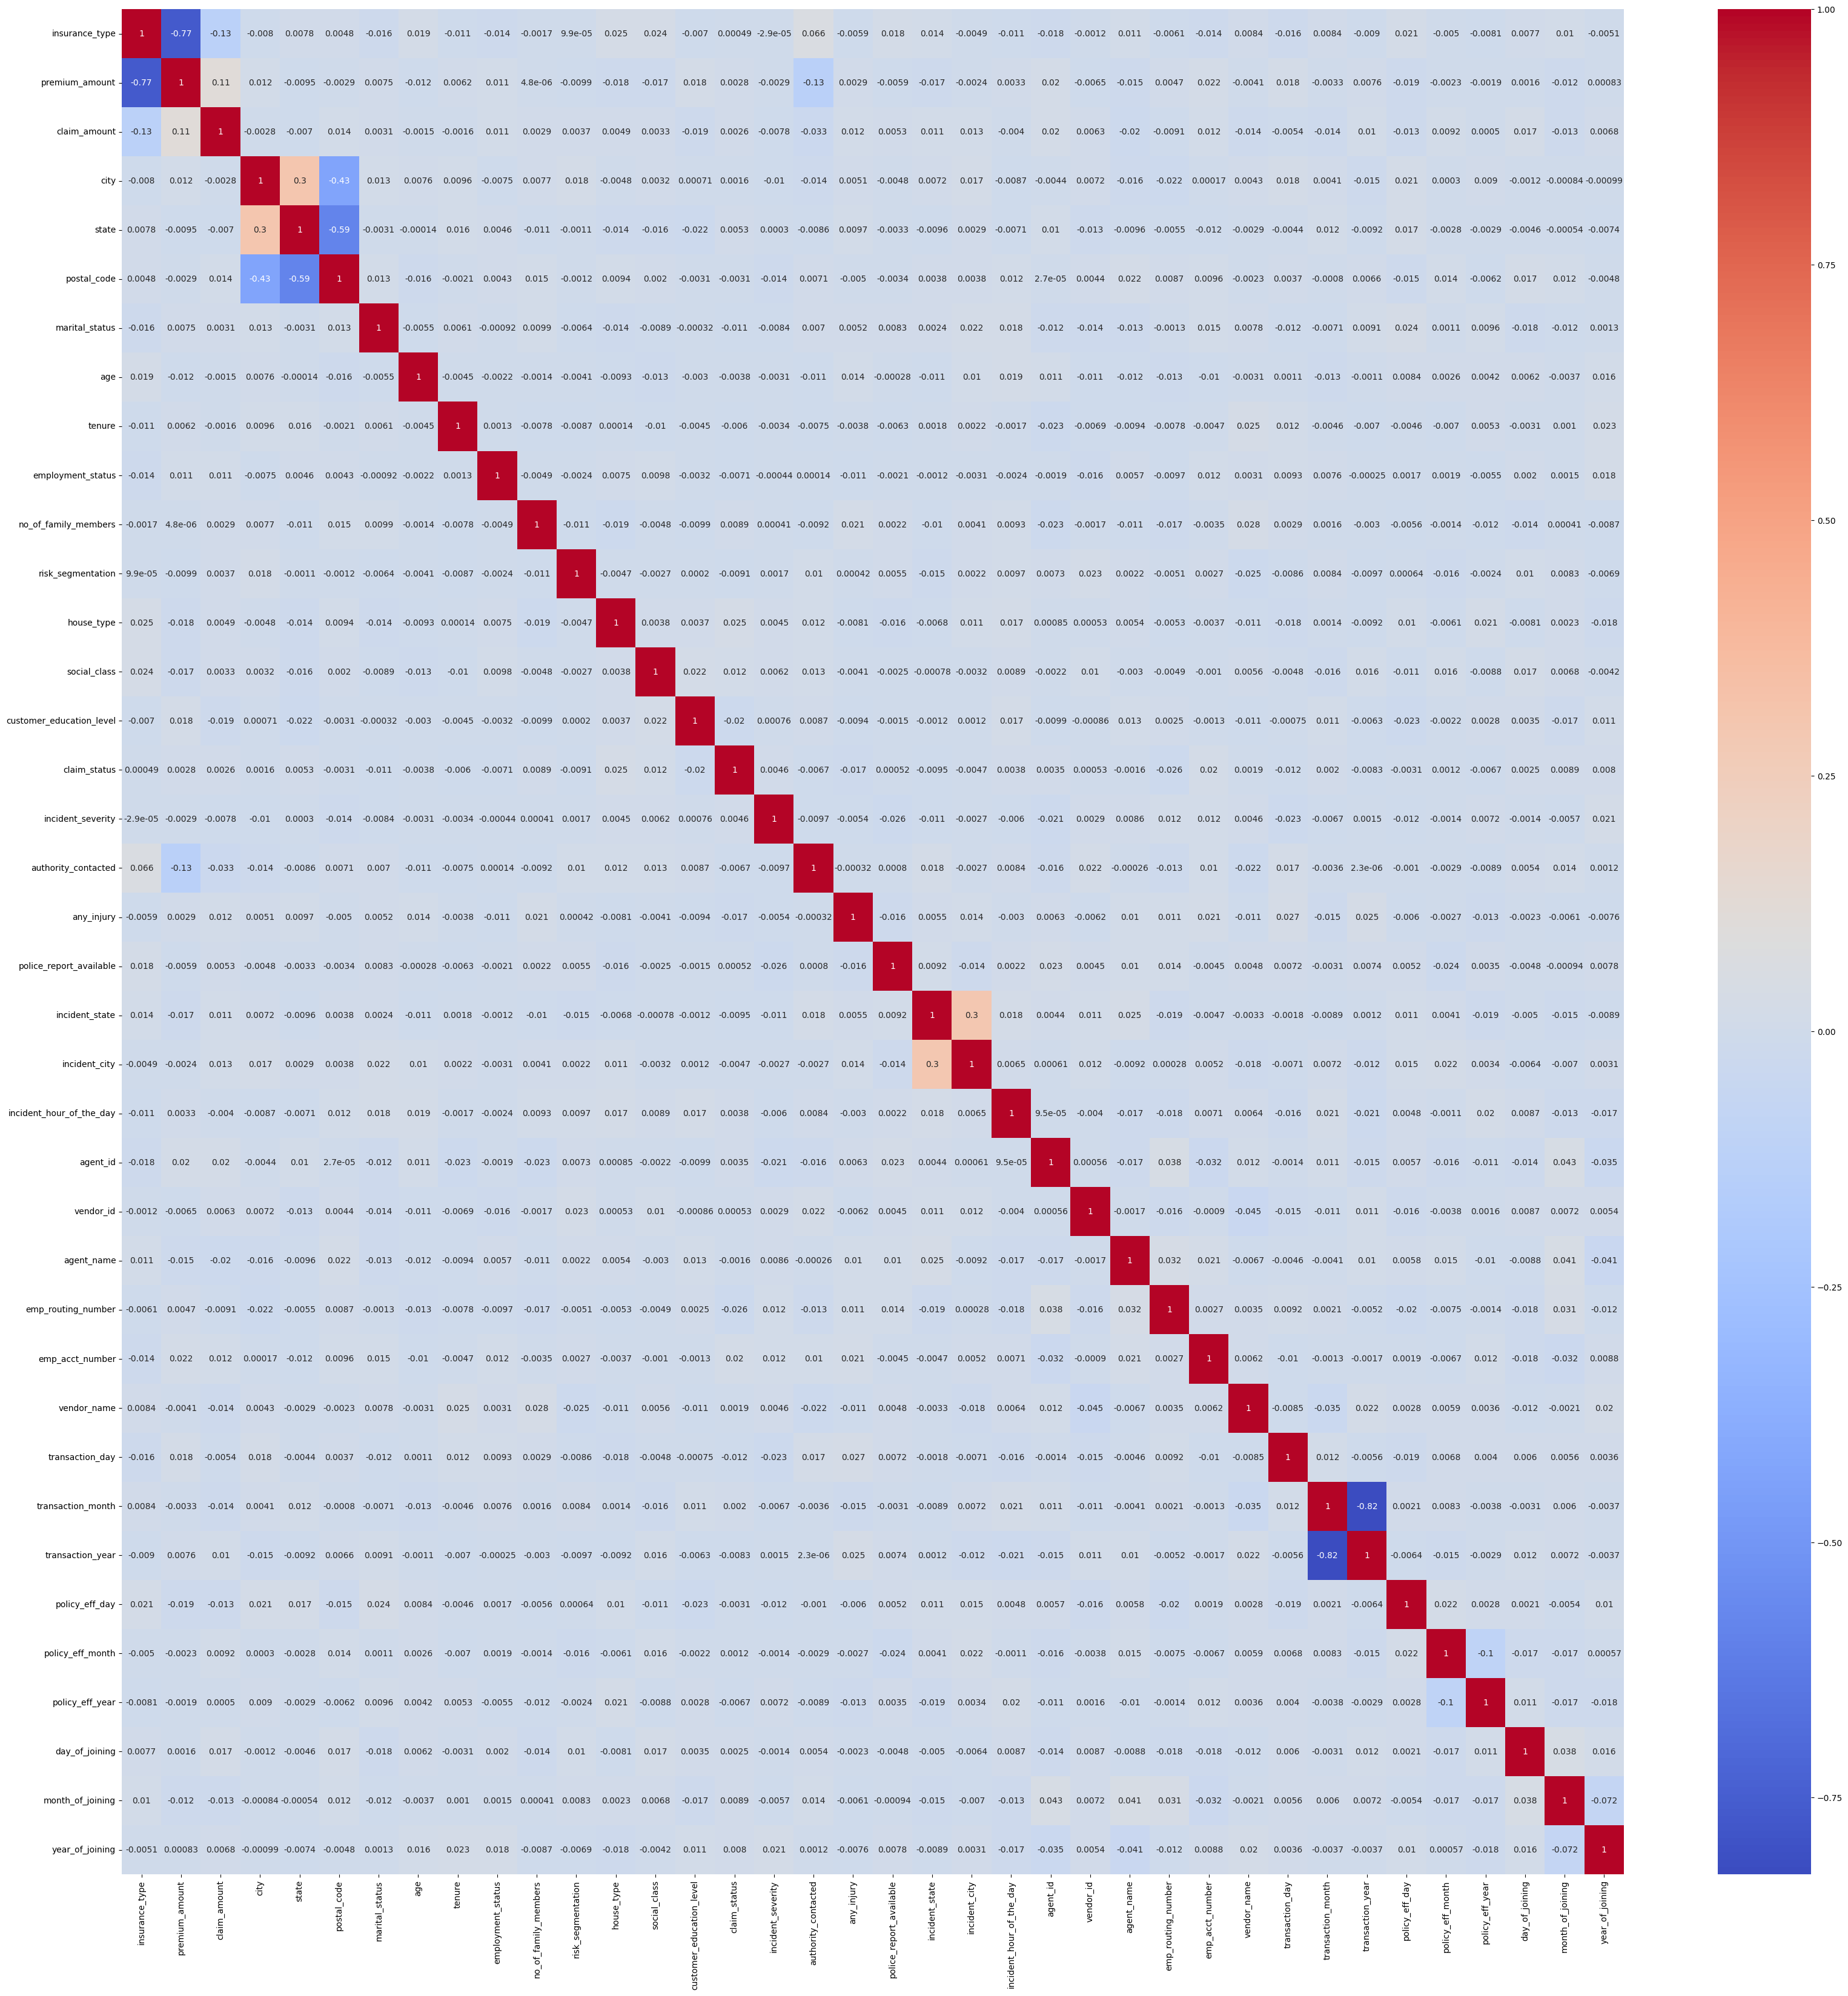

In [119]:
plt.figure(figsize=(40, 40))

sns.heatmap(data = df.corr(), annot=True, cmap = 'coolwarm')

plt.show()

In [123]:
df

,insurance_type,premium_amount,claim_amount,city,state,postal_code,marital_status,age,tenure,employment_status,no_of_family_members,risk_segmentation,house_type,social_class,customer_education_level,claim_status,incident_severity,authority_contacted,any_injury,police_report_available,incident_state,incident_city,incident_hour_of_the_day,agent_id,vendor_id,agent_name,emp_routing_number,emp_acct_number,vendor_name,transaction_day,transaction_month,transaction_year,policy_eff_day,policy_eff_month,policy_eff_year,day_of_joining,month_of_joining,year_of_joining
0,0,157.13,9000,128.0,3.0,85308,1,54,89,1,3,0,0,0,2,0,0,0,0,1,9.0,314.0,4,412.0,375.0,38.0,35441155,530.0,285.0,1,6,2020,23,6,2015,6,1,1994
1,1,141.71,26000,11.0,5.0,80005,0,61,80,1,4,0,1,1,2,0,1,1,1,0,1.0,215.0,0,768.0,400.0,523.0,44055451,1070.0,241.0,1,6,2020,21,4,2018,28,5,2004
2,1,157.24,13000,368.0,4.0,94591,0,47,68,1,6,0,1,1,3,0,1,0,0,1,5.0,126.0,19,882.0,17.0,441.0,55770246,1050.0,169.0,1,6,2020,3,10,2019,1,8,2004
3,0,172.87,16000,356.0,9.0,31404,1,36,16,1,7,0,3,1,4,0,2,1,0,0,9.0,314.0,12,277.0,44.0,883.0,87652976,1125.0,26.0,1,6,2020,29,11,2016,12,6,2007
4,2,88.53,3000,181.0,4.0,94550,1,51,16,1,2,1,1,2,4,0,0,0,0,1,14.0,225.0,18,635.0,315.0,115.0,76119019,351.0,82.0,1,6,2020,26,12,2011,19,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4,105.75,1000,196.0,6.0,6042,0,45,98,1,3,1,0,1,3,0,2,1,1,1,6.0,188.0,0,778.0,0.0,792.0,35413882,509.0,187.0,30,6,2021,11,4,2014,12,10,1990
9996,3,64.59,67000,109.0,2.0,72701,1,52,92,1,3,0,3,0,4,0,1,0,1,0,11.0,402.0,6,253.0,404.0,380.0,91206790,15.0,252.0,30,6,2021,25,8,2015,17,1,2013
9997,0,183.50,8000,3.0,0.0,99577,1,53,32,1,2,1,3,0,2,0,0,1,1,1,13.0,249.0,12,785.0,66.0,1143.0,115241097,1047.0,288.0,30,6,2021,11,10,2018,11,2,1993
9998,4,113.46,2000,254.0,4.0,94605,1,61,44,1,7,1,1,1,2,0,1,1,0,1,2.0,106.0,6,926.0,118.0,740.0,13995380,1.0,124.0,30,6,2021,29,1,2016,16,4,2010


# Classification

In [125]:
df.risk_segmentation.value_counts()

risk_segmentation
0    4395
1    4150
2    1455
Name: count, dtype: int64

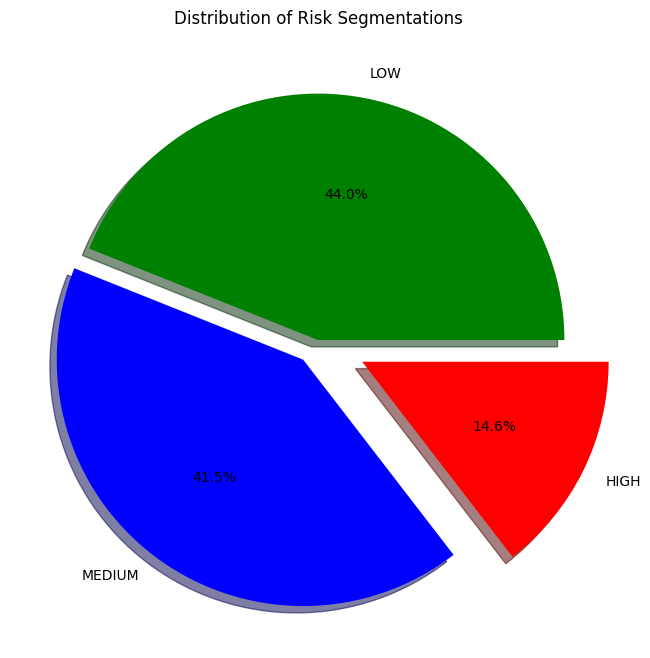

In [126]:
plt.figure(figsize= (8,8))
plt.pie(x = df['risk_segmentation'].value_counts(), labels=['LOW', 'MEDIUM', 'HIGH'], colors=['g', 'b', 'r'], explode = [0, 0.1,0.2 ], shadow = True, autopct='%1.1f%%')
plt.title('Distribution of Risk Segmentations')
plt.show()

In [124]:
x = df.drop('risk_segmentation', axis = 1)
y = df.risk_segmentation


In [128]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 37), (2000, 37), (8000,), (2000,))

In [131]:
def build_model(model_name):
    model = model_name()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_train)
    print('Training Scores \n\n')
    print('Training Dataset Accuracy : ', accuracy_score(y_pred, y_train))

    print("Train Dataset Classificatin Report : \n\n", classification_report(y_pred, y_train))

    y_pred = model.predict(X_test)

    print('Testing Scores \n\n')
    print('Test Dataset Confusion matrix \n\n:', confusion_matrix(y_test, y_pred))
    print('Test Dataset Accuracy : ', accuracy_score(y_pred, y_test))
    print("Test Dataset Classificatin Report : \n\n", classification_report(y_pred, y_test))

    return model

In [133]:
rf = build_model(RandomForestClassifier)

Training Scores 


Training Dataset Accuracy :  1.0
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3511
           1       1.00      1.00      1.00      3304
           2       1.00      1.00      1.00      1185

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Testing Scores 


Test Dataset Confusion matrix 

: [[560 324   0]
 [501 345   0]
 [155 115   0]]
Test Dataset Accuracy :  0.4525
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.63      0.46      0.53      1216
           1       0.41      0.44      0.42       784
           2       0.00      0.00      0.00         0

    accuracy                           0.45      2000
   macro avg       0.35      0.30      0.32      2000
weighted avg       0.55      0.4

In [138]:
ada = build_model(AdaBoostClassifier)

Training Scores 


Training Dataset Accuracy :  0.461625
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.69      0.46      0.55      5204
           1       0.38      0.46      0.42      2761
           2       0.01      0.34      0.02        35

    accuracy                           0.46      8000
   macro avg       0.36      0.42      0.33      8000
weighted avg       0.58      0.46      0.50      8000

Testing Scores 


Test Dataset Confusion matrix 

: [[584 297   3]
 [558 282   6]
 [182  88   0]]
Test Dataset Accuracy :  0.433
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.66      0.44      0.53      1324
           1       0.33      0.42      0.37       667
           2       0.00      0.00      0.00         9

    accuracy                           0.43      2000
   macro avg       0.33      0.29      0.30      2000
weighted avg       0.55     

In [139]:
bagging = build_model(BaggingClassifier)

Training Scores 


Training Dataset Accuracy :  0.982125
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3574
           1       0.98      0.98      0.98      3300
           2       0.95      1.00      0.97      1126

    accuracy                           0.98      8000
   macro avg       0.97      0.99      0.98      8000
weighted avg       0.98      0.98      0.98      8000

Testing Scores 


Test Dataset Confusion matrix 

: [[526 335  23]
 [481 340  25]
 [167  96   7]]
Test Dataset Accuracy :  0.4365
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.60      0.45      0.51      1174
           1       0.40      0.44      0.42       771
           2       0.03      0.13      0.04        55

    accuracy                           0.44      2000
   macro avg       0.34      0.34      0.32      2000
weighted avg       0.50    

In [141]:
hist = build_model(HistGradientBoostingClassifier)

Training Scores 


Training Dataset Accuracy :  0.966125
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.99      0.96      0.97      3620
           1       0.99      0.96      0.97      3387
           2       0.84      1.00      0.91       993

    accuracy                           0.97      8000
   macro avg       0.94      0.97      0.95      8000
weighted avg       0.97      0.97      0.97      8000

Testing Scores 


Test Dataset Confusion matrix 

: [[489 381  14]
 [460 380   6]
 [131 133   6]]
Test Dataset Accuracy :  0.4375
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.55      0.45      0.50      1080
           1       0.45      0.43      0.44       894
           2       0.02      0.23      0.04        26

    accuracy                           0.44      2000
   macro avg       0.34      0.37      0.33      2000
weighted avg       0.50    

In [142]:
gradient = build_model(GradientBoostingClassifier)

Training Scores 


Training Dataset Accuracy :  0.603
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.79      0.58      0.67      4778
           1       0.60      0.63      0.61      3155
           2       0.06      0.99      0.11        67

    accuracy                           0.60      8000
   macro avg       0.48      0.73      0.46      8000
weighted avg       0.71      0.60      0.64      8000

Testing Scores 


Test Dataset Confusion matrix 

: [[540 343   1]
 [516 327   3]
 [163 106   1]]
Test Dataset Accuracy :  0.434
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.61      0.44      0.51      1219
           1       0.39      0.42      0.40       776
           2       0.00      0.20      0.01         5

    accuracy                           0.43      2000
   macro avg       0.33      0.35      0.31      2000
weighted avg       0.52      0.

In [143]:
extratrees = build_model(ExtraTreesClassifier)

Training Scores 


Training Dataset Accuracy :  1.0
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3511
           1       1.00      1.00      1.00      3304
           2       1.00      1.00      1.00      1185

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Testing Scores 


Test Dataset Confusion matrix 

: [[529 355   0]
 [510 336   0]
 [158 112   0]]
Test Dataset Accuracy :  0.4325
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.60      0.44      0.51      1197
           1       0.40      0.42      0.41       803
           2       0.00      0.00      0.00         0

    accuracy                           0.43      2000
   macro avg       0.33      0.29      0.31      2000
weighted avg       0.52      0.4

In [144]:
extratree = build_model(ExtraTreeClassifier)

Training Scores 


Training Dataset Accuracy :  1.0
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3511
           1       1.00      1.00      1.00      3304
           2       1.00      1.00      1.00      1185

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Testing Scores 


Test Dataset Confusion matrix 

: [[371 363 150]
 [364 362 120]
 [127 103  40]]
Test Dataset Accuracy :  0.3865
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.42      0.43      0.42       862
           1       0.43      0.44      0.43       828
           2       0.15      0.13      0.14       310

    accuracy                           0.39      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.38      0.3

In [145]:
xgb = build_model(XGBClassifier)

Training Scores 


Training Dataset Accuracy :  0.9945
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3530
           1       1.00      0.99      1.00      3317
           2       0.97      1.00      0.99      1153

    accuracy                           0.99      8000
   macro avg       0.99      1.00      0.99      8000
weighted avg       0.99      0.99      0.99      8000

Testing Scores 


Test Dataset Confusion matrix 

: [[472 394  18]
 [435 398  13]
 [147 119   4]]
Test Dataset Accuracy :  0.437
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.53      0.45      0.49      1054
           1       0.47      0.44      0.45       911
           2       0.01      0.11      0.03        35

    accuracy                           0.44      2000
   macro avg       0.34      0.33      0.32      2000
weighted avg       0.50      0

In [146]:
dicision = build_model(DecisionTreeClassifier)

Training Scores 


Training Dataset Accuracy :  1.0
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3511
           1       1.00      1.00      1.00      3304
           2       1.00      1.00      1.00      1185

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

Testing Scores 


Test Dataset Confusion matrix 

: [[375 358 151]
 [386 328 132]
 [123 104  43]]
Test Dataset Accuracy :  0.373
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.42      0.42      0.42       884
           1       0.39      0.42      0.40       790
           2       0.16      0.13      0.14       326

    accuracy                           0.37      2000
   macro avg       0.32      0.32      0.32      2000
weighted avg       0.37      0.37

In [147]:
svc = build_model(SVC)

Training Scores 


Training Dataset Accuracy :  0.438875
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      0.44      0.61      8000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.44      8000
   macro avg       0.33      0.15      0.20      8000
weighted avg       1.00      0.44      0.61      8000

Testing Scores 


Test Dataset Confusion matrix 

: [[884   0   0]
 [846   0   0]
 [270   0   0]]
Test Dataset Accuracy :  0.442
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       1.00      0.44      0.61      2000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.44      2000
   macro avg       0.33      0.15      0.20      2000
weighted avg       1.00     

In [148]:
knn = build_model(KNeighborsClassifier)

Training Scores 


Training Dataset Accuracy :  0.596625
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.77      0.57      0.66      4719
           1       0.59      0.63      0.61      3080
           2       0.10      0.59      0.17       201

    accuracy                           0.60      8000
   macro avg       0.49      0.60      0.48      8000
weighted avg       0.68      0.60      0.63      8000

Testing Scores 


Test Dataset Confusion matrix 

: [[524 344  16]
 [495 336  15]
 [158 104   8]]
Test Dataset Accuracy :  0.434
Test Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.59      0.45      0.51      1177
           1       0.40      0.43      0.41       784
           2       0.03      0.21      0.05        39

    accuracy                           0.43      2000
   macro avg       0.34      0.36      0.32      2000
weighted avg       0.51     

In [149]:
lgbm = build_model(LGBMClassifier)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2995
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 37
[LightGBM] [Info] Start training from score -0.823541
[LightGBM] [Info] Start training from score -0.884308
[LightGBM] [Info] Start training from score -1.909699
Training Scores 


Training Dataset Accuracy :  0.913375
Train Dataset Classificatin Report : 

               precision    recall  f1-score   support

           0       0.98      0.89      0.93      3865
           1       0.96      0.92      0.94      3432
           2       0.59      1.00      0.74       703

    accuracy                           0.91      8000
   macro avg       0.84      0.94      0.87      8000
weighted avg       0.94      0.91      0.92      8000

Testing 

In [140]:
y_test.value_counts(), y_train.value_counts()

(risk_segmentation
 0    884
 1    846
 2    270
 Name: count, dtype: int64,
 risk_segmentation
 0    3511
 1    3304
 2    1185
 Name: count, dtype: int64)